<a href="https://colab.research.google.com/github/jagdish0307/jagdish_kaggle/blob/main/MNIST_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Example: Reading a CSV file from Google Drive
file_path = '/content/train.csv'
df = pd.read_csv(file_path)
df.head()



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
file_path = '/content/test.csv'
dft = pd.read_csv(file_path)
(dft.head())


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df.shape)
print(dft.shape)

(42000, 785)
(28000, 784)


In [ ]:
df.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [ ]:
dft.isnull().sum()

,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [ ]:
print(df.duplicated().sum())
print(dft.duplicated().sum())

0
0


In [ ]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [ ]:
dft.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [ ]:
df['label'].value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


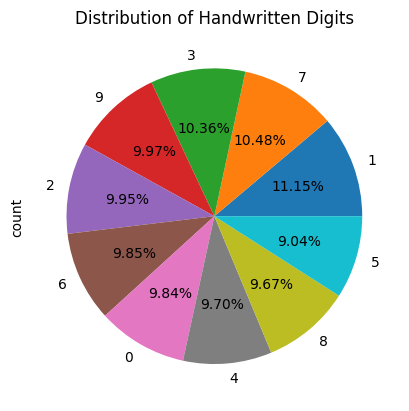

In [ ]:
df['label'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Distribution of Handwritten Digits')
plt.show()

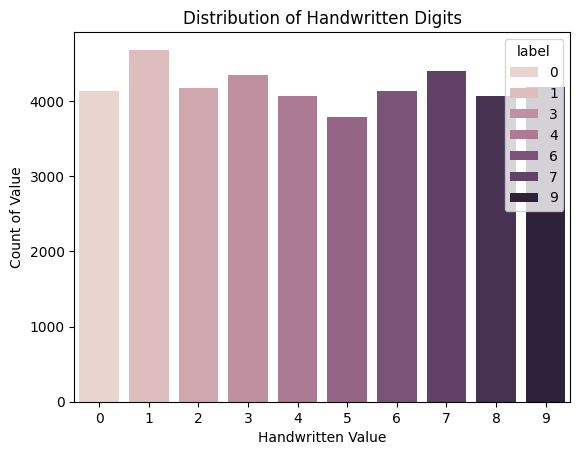

In [ ]:
sns.barplot(x=df["label"].value_counts().index, y=df["label"].value_counts().values,hue=df["label"].value_counts().index)
plt.xlabel("Handwritten Value")
plt.ylabel("Count of Value")
plt.title("Distribution of Handwritten Digits")
plt.show()

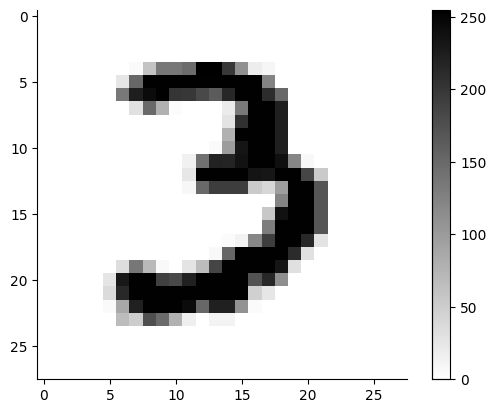

In [ ]:
digit = df.loc[9, 'pixel0':]
arr = np.array(digit)

image_arr = np.reshape(arr, (28,28))
dig_img = plt.imshow(image_arr, cmap=plt.cm.binary)
plt.colorbar(dig_img)
sns.despine()

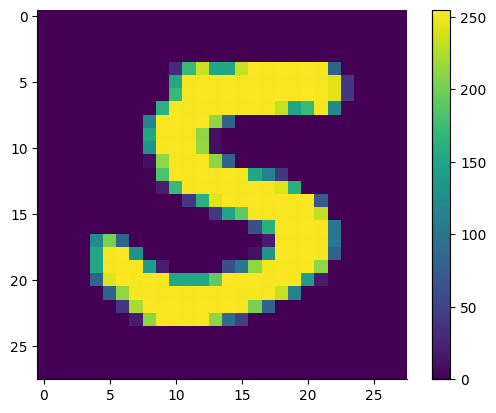

In [ ]:
digit = df.loc[99, 'pixel0':]
arr = np.array(digit)

image_arr = np.reshape(arr, (28,28))
dig_img = plt.imshow(image_arr, cmap='viridis')
plt.colorbar(dig_img)
sns.despine()


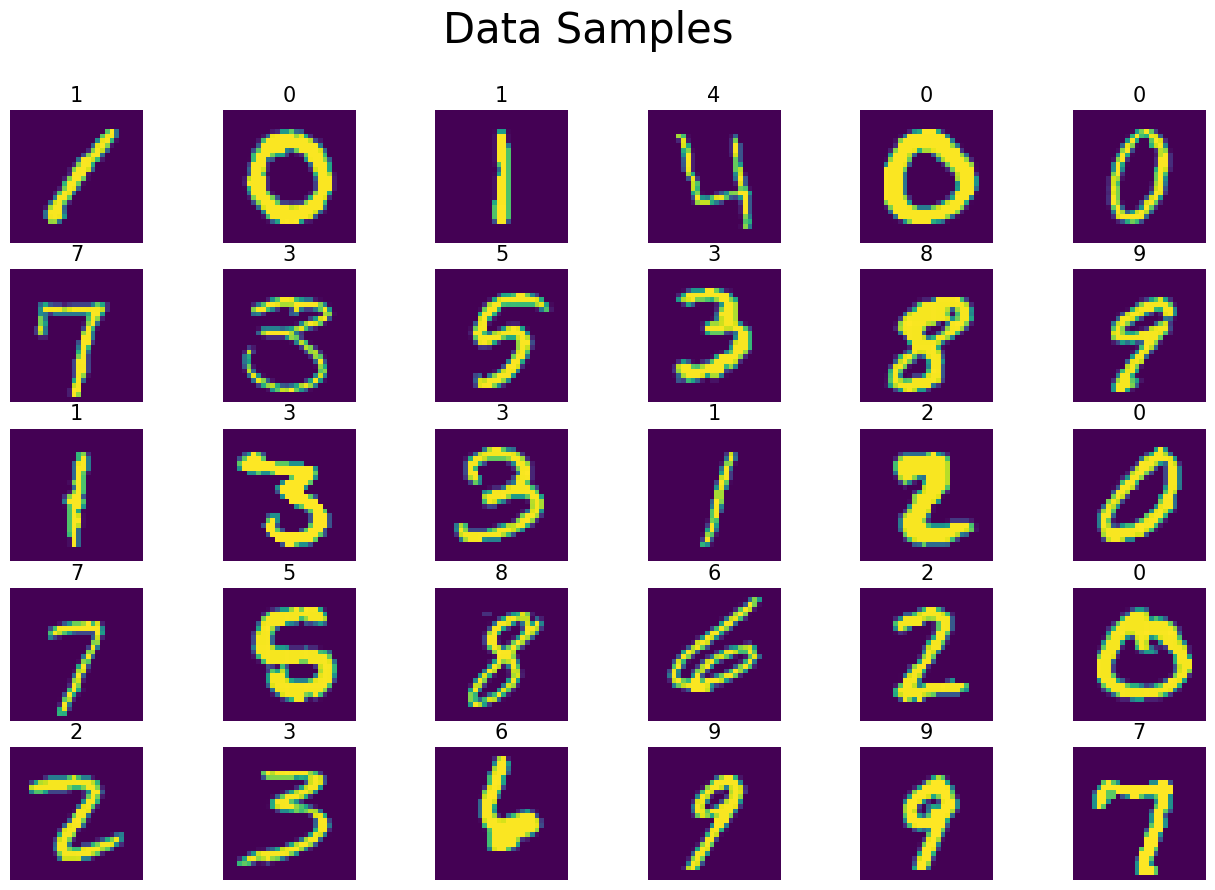

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(16,10))

i = 0
for row in range(5):
  for col in range(6):
    axs[row][col].imshow(df.iloc[i, 1:].values.reshape(28,28), cmap='viridis')
    axs[row][col].set_title(str(df.iloc[i, 0]), fontsize=15)
    axs[row][col].axis('off')
    i+=1

plt.suptitle('Data Samples', fontsize=30)
plt.show()

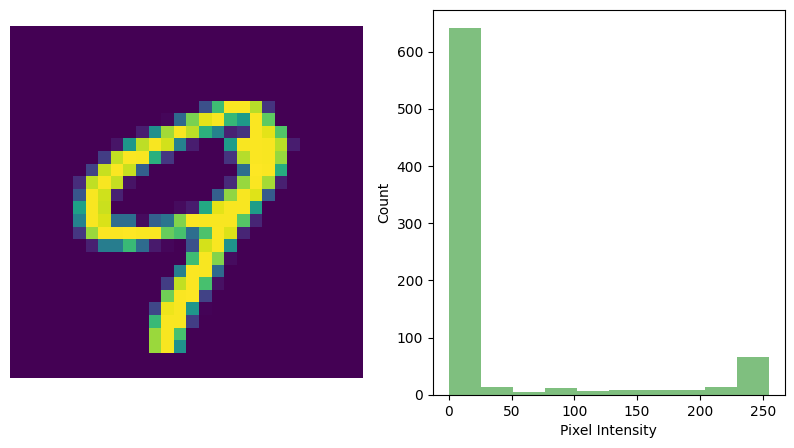

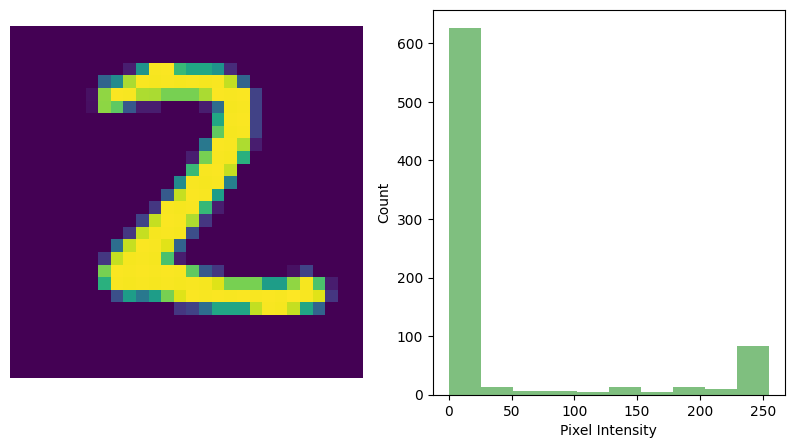

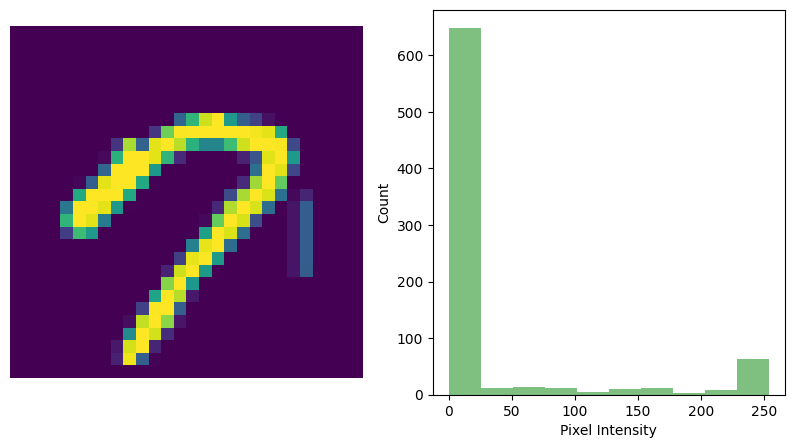

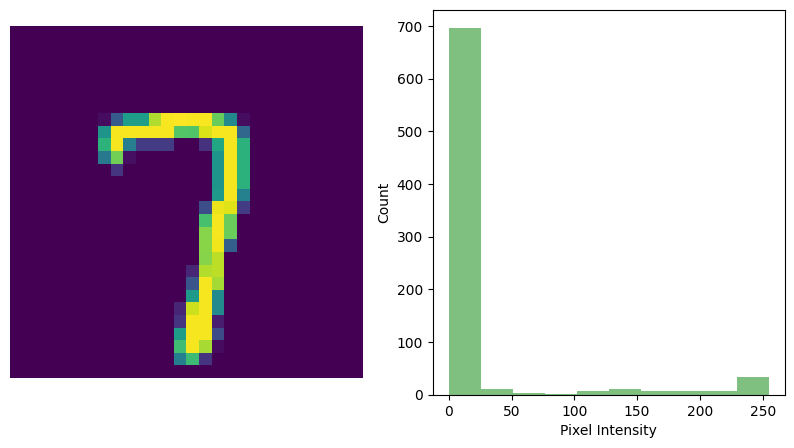

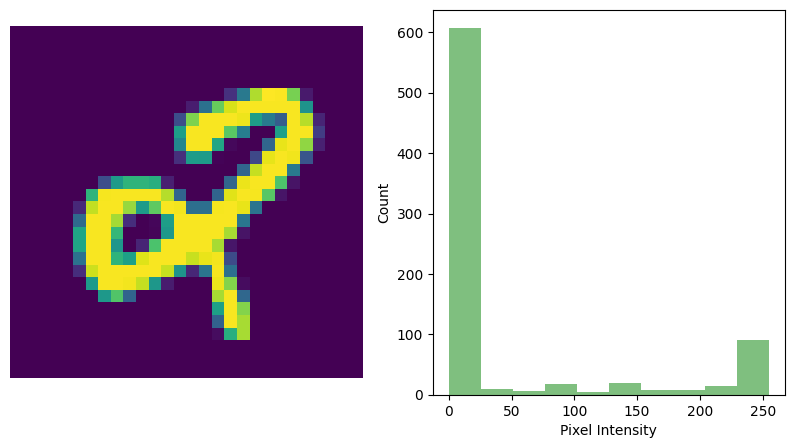

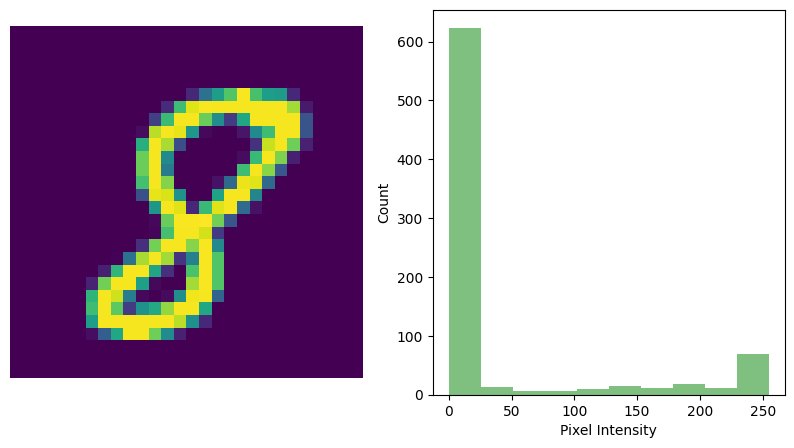

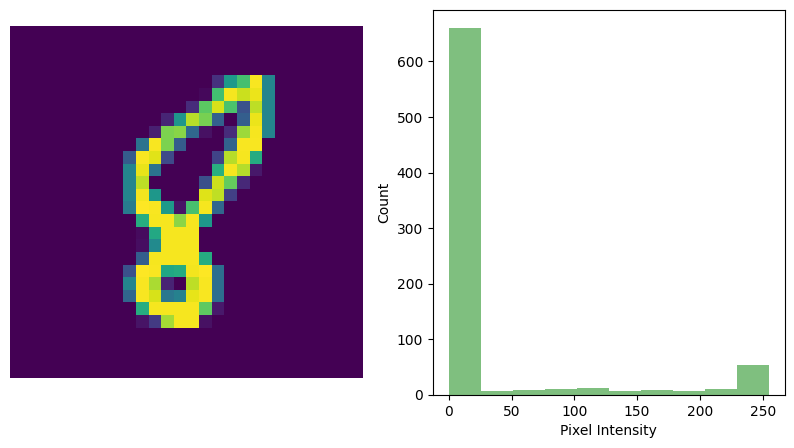

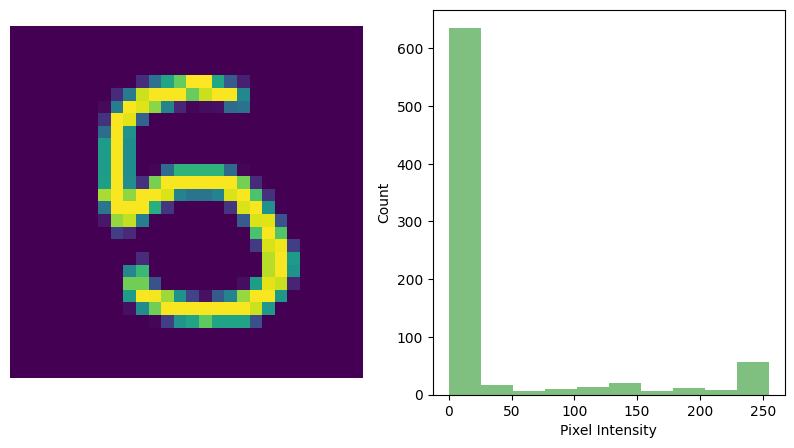

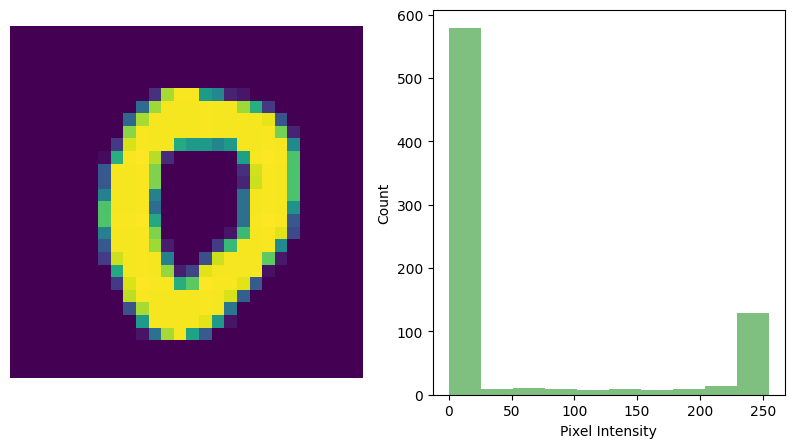

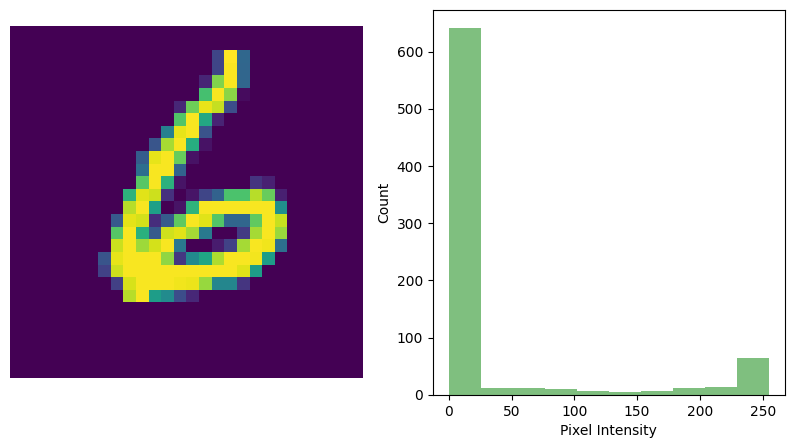

In [ ]:
def plotHist(img):
  img = df.iloc[img, 1:].values.reshape(28,28)
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.imshow(img, cmap='viridis')
  plt.axis('off')
  histo = plt.subplot(1,2,2)
  histo.set_ylabel('Count')
  histo.set_xlabel('Pixel Intensity')
  plt.hist(img.flatten(), bins=10, lw=0, color='green', alpha=0.5)

for i in range(100,110):
  plotHist(i)


In [ ]:
for i in (df.columns):
  print(df[i].value_counts())

Streaming output truncated to the last 5000 lines.
48         1
5          1
Name: count, dtype: int64
pixel423
0      41807
2          8
254        8
255        7
57         5
       ...  
79         1
139        1
145        1
221        1
178        1
Name: count, Length: 119, dtype: int64
pixel424
0      40802
253       78
254       53
255       52
128       21
       ...  
199        1
211        1
161        1
237        1
81         1
Name: count, Length: 233, dtype: int64
pixel425
0      37779
253      417
254      295
255      194
252      142
       ...  
223        3
239        2
119        2
204        2
90         2
Name: count, Length: 256, dtype: int64
pixel426
0      33979
253     1209
252      563
254      531
255      239
       ...  
165        7
75         7
179        6
148        6
124        5
Name: count, Length: 256, dtype: int64
pixel427
0      29426
253     2148
254     1060
252      986
255      356
       ...  
78        10
163       10
129       10
148    

In [ ]:
X=df.drop(['label'],axis=1)


In [ ]:
y=df['label']


In [ ]:

# Split data into features and labels
X = X.values  # Pixel values
y = y.values   # Labels (digits)

# Normalize the pixel values (0-255 -> 0-1)
X = X / 255.0
X = X.reshape(-1, 28, 28, 1)

# Flatten labels if multi-dimensional and convert to one-hot encoding
y = y.ravel()
# num_classes = len(np.unique(y))
y = to_categorical(y, 10)


In [ ]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='tanh', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='tanh'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='tanh'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=128,
    verbose=1
)


val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

Epoch 1/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 37s 134ms/step - accuracy: 0.7574 - loss: 0.7625 - val_accuracy: 0.9599 - val_loss: 0.1316
Epoch 2/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 38s 145ms/step - accuracy: 0.9562 - loss: 0.1490 - val_accuracy: 0.9761 - val_loss: 0.0795
Epoch 3/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 38s 133ms/step - accuracy: 0.9714 - loss: 0.0979 - val_accuracy: 0.9805 - val_loss: 0.0638
Epoch 4/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.9724 - loss: 0.0877 - val_accuracy: 0.9833 - val_loss: 0.0534
Epoch 5/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 35s 132ms/step - accuracy: 0.9766 - loss: 0.0765 - val_accuracy: 0.9855 - val_loss: 0.0488
Epoch 6/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 132ms/step - accuracy: 0.9766 - loss: 0.0692 - val_accuracy: 0.9844 - val_loss: 0.0518
Epoch 7/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step - accuracy: 0.9806 - loss: 0.0636 - val_accuracy: 0.9852 - val_loss: 0.0471
Epoch 8/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 40s 130ms/step - accuracy: 0.9812 - loss: 0

In [ ]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=128,
    verbose=1
)


val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

Epoch 1/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 36s 130ms/step - accuracy: 0.6757 - loss: 0.9720 - val_accuracy: 0.9670 - val_loss: 0.1174
Epoch 2/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 44s 143ms/step - accuracy: 0.9472 - loss: 0.1755 - val_accuracy: 0.9768 - val_loss: 0.0747
Epoch 3/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 38s 130ms/step - accuracy: 0.9658 - loss: 0.1198 - val_accuracy: 0.9811 - val_loss: 0.0564
Epoch 4/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 33s 127ms/step - accuracy: 0.9722 - loss: 0.0942 - val_accuracy: 0.9817 - val_loss: 0.0539
Epoch 5/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 128ms/step - accuracy: 0.9745 - loss: 0.0808 - val_accuracy: 0.9837 - val_loss: 0.0494
Epoch 6/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 127ms/step - accuracy: 0.9780 - loss: 0.0734 - val_accuracy: 0.9868 - val_loss: 0.0424
Epoch 7/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 33s 127ms/step - accuracy: 0.9790 - loss: 0.0675 - val_accuracy: 0.9880 - val_loss: 0.0373
Epoch 8/15
263/263 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.9828 - loss: 0

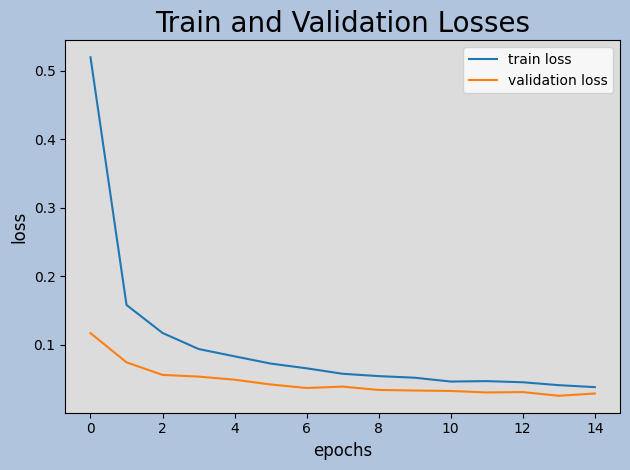

In [ ]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('loss',fontsize=12)
plt.legend()

plt.title('Train and Validation Losses',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

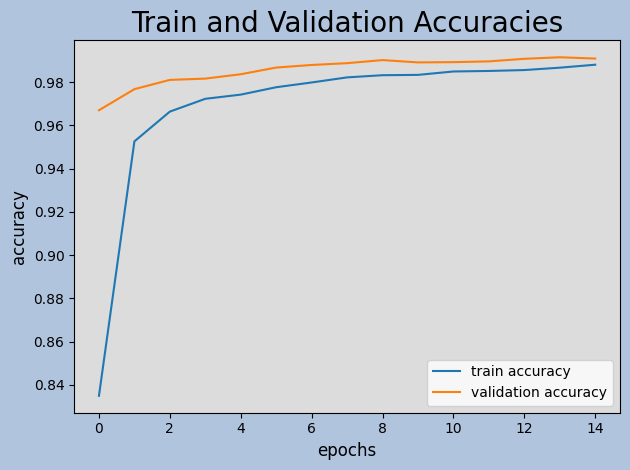

In [ ]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs',fontsize=12)
plt.ylabel('accuracy',fontsize=12)
plt.legend()

plt.title('Train and Validation Accuracies',fontsize=20)

plt.tight_layout()
plt.gca().set_facecolor('gainsboro')
plt.gcf().patch.set_facecolor('lightsteelblue')

In [ ]:

# Save the model
model.save("cnn_model.h5")

In [ ]:

# Convert to NumPy array
X1 = dft.to_numpy()  # or X.values

# Reshape X to 4D for CNN
X1 = X1.reshape(-1, 28, 28, 1)  # Assuming 28x28 grayscale images


In [ ]:
X1.shape

(28000, 28, 28, 1)

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

# Normalize the test data (same as the training data)
X1 = X1 / 255.0  # Scale pixel values to [0, 1]

# Load the trained CNN model
model = load_model("cnn_model.h5")  # Load the model you saved earlier

# Predict the labels for the test data
predictions = model.predict(X1)

# Convert predictions from one-hot encoding to actual class labels
predicted_labels = np.argmax(predictions, axis=1)

# Show the predicted labels
print(predicted_labels)


875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step
[2 0 9 ... 3 9 2]


In [ ]:
predicted_labels.shape

(28000,)

In [ ]:
submission =  pd.DataFrame({
        "ImageId": dft.index+1,
        "Label":predicted_labels
    })



In [ ]:
submission['Label'].value_counts()

,count
Label,
1,3210
7,2883
2,2829
4,2781
0,2772
3,2760
9,2759
8,2757
6,2747


In [ ]:
from google.colab import files

# Save the DataFrame to CSV
submission.to_csv('my_submission.csv', index=False)

# Download the file
files.download('my_submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>